In [38]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("freshman_15.csv")
# Renaming columns
df.columns = ["gender", "september_weight_kg", "april_weight_kg", "september_bmi", "april_bmi"]
# Creating a column to check how much weight was gained / lost
# Weight gained is a positive number; weight lost is a negative number
df["delta"] = df["april_weight_kg"] - df["september_weight_kg"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               67 non-null     object 
 1   september_weight_kg  67 non-null     int64  
 2   april_weight_kg      67 non-null     int64  
 3   september_bmi        67 non-null     float64
 4   april_bmi            67 non-null     float64
 5   delta                67 non-null     int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 3.3+ KB


Here's the distribution of our data:

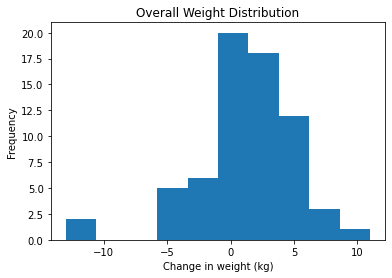

In [45]:
# ALL
df.delta.plot.hist()
plt.title(f"Overall Weight Distribution")
plt.xlabel("Change in weight (kg)")
plt.show()

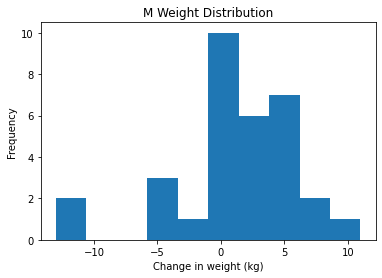

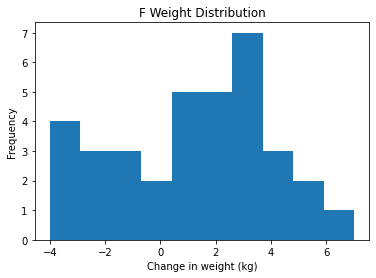

In [43]:
for curr_gender in df.gender.unique():
  df.loc[df.gender == curr_gender, "delta"].plot.hist()
  plt.title(f"{curr_gender} Weight Distribution")
  plt.xlabel("Change in weight (kg)")
  plt.show()

In [46]:
gender_data_list = []

for curr_gender in df.gender.unique():
  change_in_weight_for_gender = df.loc[df["gender"] == curr_gender, 'delta']
  
  gender_data_list.append(change_in_weight_for_gender)
  
  # Here, we're splitting the data we're looking at into four parts
  quartiles = change_in_weight_for_gender.quantile([.25,.5,.75])

  # 25% of all data is lower than Q1
  first_quartile = quartiles[0.25]

  # 75% of all data is lower than Q3
  third_quartile = quartiles[0.75]
  
  # IQR - The IQR is the range for the middle 50% of your data
  iqr = third_quartile - first_quartile

  # Lower and Upper bounds are the edge of non-outlier data
  # Any number lower than the lower_bound is considered an outlier
  # Any number higher than the upper_bound is considered an outlier
  lower_bound = first_quartile - (1.5*iqr)
  upper_bound = third_quartile + (1.5*iqr)

  # Here, we use .loc to see if there are any values lower or higher than the bounds
  outliers = change_in_weight_for_gender.loc[(change_in_weight_for_gender < lower_bound) | 
                                             (change_in_weight_for_gender > upper_bound)]

  print(f"Potential outliers for {curr_gender}: ")

  if len(outliers) == 0:
    print("\tNo outliers")
  else:
    print(outliers)
  
  print()

Potential outliers for M: 
0    -13
1    -11
66    11
Name: delta, dtype: int64

Potential outliers for F: 
	No outliers

